Team Name :- **tan04sh29210**

Round Number :- **2**

Team Members :- **Anshu Tank, Rhydham Singla**

Problem Statement :- Organizations encounter challenges in accurately forecasting demand, leading to issues like stockouts and excess inventory due to inefficient inventory management.

Domain :- **Pharmaceuticals**

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset



This dataset contains monthly data from the years 2014 to 2019. The various **features** included are:

- **Date**: The month and year of the data.
- **Weather**: The season during the specified time.
- **Birth Rate**: The birth rate for the corresponding year.
- **Death Rate**: The death rate for the corresponding year.
- **Population**: The population for the corresponding year.
- **Upcoming Drugs Category**: Areas of ongoing research in pharmaceuticals.
- **Per Capita Income**: The per capita income for the corresponding year.
- **Number of Holidays**: The number of holidays in the specified month.
- **Pandemic**: Indicates if there was an ongoing pandemic.
- **M01AB**: Sales volume of non-steroidal anti-inflammatory and antirheumatic products, specifically acetic acid derivatives and related compounds.
- **M01AE**: Sales volume of non-steroidal anti-inflammatory and antirheumatic products, specifically propionic acid derivatives.
- **N02BA**: Sales volume of other analgesics and antipyretics, specifically salicylic acid and derivatives.
- **N02BE**: Sales volume of other analgesics and antipyretics, specifically pyrazolones and anilides.
- **N05B**: Sales volume of psycholeptic drugs, specifically anxiolytics.
- **N05C**: Sales volume of psycholeptic drugs, specifically hypnotics and sedatives.
- **R03**: Sales volume of drugs for obstructive airway diseases.
- **R06**: Sales volume of antihistamines for systemic use.

In [2]:
dataset = pd.read_csv('Dataset1.csv')
dataset.head()

,Date (month),Weather,Birth rate,Death Rate,Population,Upcomming Drugs Category,Per capita,No. of Holidays,Pandemic,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,31-01-2014,Winter,19.252,7.257,130.72,N02BA,"73,512",10,NO,127.69,99.090,152.100,878.030,354.0,50,112.0,48.2
1,28-02-2014,Winter,19.242,7.257,130.74,M01AB,"74,839",7,NO,133.32,126.050,177.000,1001.900,347.0,31,122.0,36.2
2,31-03-2014,Transition,19.232,7.256,130.81,M01AE,"75,294",9,NO,137.44,92.950,147.655,779.275,232.0,20,112.0,85.4
3,30-04-2014,Summer,19.252,7.256,130.86,N05B,"76,781",11,NO,113.10,89.475,130.900,698.500,209.0,18,97.0,73.7
4,31-05-2014,Summer,19.220,7.256,130.87,N02BE,"77,456",9,NO,101.79,119.933,132.100,628.780,270.0,23,107.0,123.7


In [3]:
dataset.describe(include='all')

,Date (month),Weather,Birth rate,Death Rate,Population,Upcomming Drugs Category,Per capita,No. of Holidays,Pandemic,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70,70,70.000000,70,70.000000,70,70,70.000000,70,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
unique,70,4,NaN,32,NaN,8,70,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,31-01-2014,Transition,NaN,7.255,NaN,M01AB,"73,512",NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,NaN,4,NaN,13,1,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,18.422729,NaN,135.037857,NaN,NaN,9.657143,NaN,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,NaN,NaN,0.377032,NaN,2.730739,NaN,NaN,1.614120,NaN,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,NaN,NaN,17.806000,NaN,130.260000,NaN,NaN,7.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,18.205250,NaN,133.120000,NaN,NaN,9.000000,NaN,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,NaN,NaN,18.325000,NaN,135.060000,NaN,NaN,9.000000,NaN,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,NaN,NaN,18.629000,NaN,137.415000,NaN,NaN,11.000000,NaN,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500


Next, we will focus on cleaning the data by addressing outliers using the quantile method

In [4]:
q = dataset['M01AB'].quantile(0.03)
v = dataset['N02BE'].quantile(0.97)
dataset = dataset[dataset['M01AB'] >= q]
dataset = dataset[dataset['N02BE'] < v]

In [5]:
dataset.describe(include='all')

,Date (month),Weather,Birth rate,Death Rate,Population,Upcomming Drugs Category,Per capita,No. of Holidays,Pandemic,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,64,64,64.000000,64,64.000000,64,64,64.000000,64,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
unique,64,4,NaN,29,NaN,8,64,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,31-01-2014,Transition,NaN,7.243,NaN,M01AB,"73,512",NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,21,NaN,4,NaN,12,1,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,18.427453,NaN,135.032500,NaN,NaN,9.593750,NaN,153.898594,116.501859,116.797016,881.441453,265.110937,17.937500,167.972656,90.325781
std,NaN,NaN,0.368687,NaN,2.674884,NaN,NaN,1.590834,NaN,21.883140,16.684988,24.667549,271.270041,74.985006,8.286296,74.861408,44.504540
min,NaN,NaN,17.820000,NaN,130.260000,NaN,NaN,7.000000,NaN,108.780000,88.269000,75.200000,479.350000,132.000000,5.000000,37.000000,30.600000
25%,NaN,NaN,18.217750,NaN,133.180000,NaN,NaN,8.750000,NaN,137.970000,103.520750,96.125000,651.721500,225.250000,12.000000,114.250000,52.625000
50%,NaN,NaN,18.322500,NaN,134.785000,NaN,NaN,9.000000,NaN,155.065000,114.547000,117.225000,865.824500,249.700000,18.000000,160.000000,79.000000
75%,NaN,NaN,18.639500,NaN,137.345000,NaN,NaN,11.000000,NaN,168.447500,127.481500,133.937500,1047.745500,291.600000,23.000000,216.750000,121.150000



Next, we need to convert the following data into correct format:

- **Date**

In [6]:
dataset['month'] = dataset['Date (month)'].apply(lambda x: int(x.split('-')[1]))
dataset['year'] = dataset['Date (month)'].apply(lambda x: int(x.split('-')[2]))

# Delete the original 'Date (month)' column
dataset = dataset.drop('Date (month)', axis=1)

In [7]:
dataset['month'] = dataset['month'] + (dataset['year'] - 2014) * 12
dataset = dataset.drop('year', axis=1)

- **Per Capita**

In [8]:
dataset['Per capita'] = dataset['Per capita'].str.replace(',', '').astype(float)



*   **Death Rate**


In [9]:
# Convert 'Death Rate' to numeric, handling errors
dataset['Death Rate'] = pd.to_numeric(dataset['Death Rate'], errors='coerce')

Since over 90% of the observations have a value of "NO" in the Pandemic column, we may choose to disregard this parameter as it is unlikely to provide significant insights.

However, if we decide to include this parameter, we can use the following code:


```
dataset['Pandemic'] = dataset['Pandemic'].map({'YES':1, 'NO':0})
```



In [10]:
dataset = dataset.drop('Pandemic', axis=1)

In [11]:
dataset.head()

,Weather,Birth rate,Death Rate,Population,Upcomming Drugs Category,Per capita,No. of Holidays,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,month
0,Winter,19.252,7.257,130.72,N02BA,73512.0,10,127.69,99.090,152.100,878.030,354.0,50,112.0,48.2,1
1,Winter,19.242,7.257,130.74,M01AB,74839.0,7,133.32,126.050,177.000,1001.900,347.0,31,122.0,36.2,2
2,Transition,19.232,7.256,130.81,M01AE,75294.0,9,137.44,92.950,147.655,779.275,232.0,20,112.0,85.4,3
3,Summer,19.252,7.256,130.86,N05B,76781.0,11,113.10,89.475,130.900,698.500,209.0,18,97.0,73.7,4
5,Summer,19.020,7.255,130.89,M01AE,78923.0,9,112.07,94.710,122.900,548.225,323.0,23,57.0,109.3,6


In our dataset, we aim to use the previous month's demand to forecast the current month's demand. To achieve this, we will copy the previous month's demand for all the medicines and use that data to predict the current one. By doing so, we also related the demand of one madicine with another.


In [12]:
dataset['prev_M01AB'] = dataset['M01AB'].shift(1)
dataset['prev_M01AE'] = dataset['M01AE'].shift(1)
dataset['prev_N02BA'] = dataset['N02BA'].shift(1)
dataset['prev_N02BE'] = dataset['N02BE'].shift(1)
dataset['prev_N05B'] = dataset['N05B'].shift(1)
dataset['prev_N05C'] = dataset['N05C'].shift(1)
dataset['prev_R03'] = dataset['R03'].shift(1)
dataset['prev_R06'] = dataset['R06'].shift(1)

In [13]:
dataset.describe(include='all')

,Weather,Birth rate,Death Rate,Population,Upcomming Drugs Category,Per capita,No. of Holidays,M01AB,M01AE,N02BA,...,R06,month,prev_M01AB,prev_M01AE,prev_N02BA,prev_N02BE,prev_N05B,prev_N05C,prev_R03,prev_R06
count,64,64.000000,63.000000,64.000000,64,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
unique,4,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Transition,NaN,NaN,NaN,M01AB,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18.427453,7.247714,135.032500,NaN,112189.343750,9.593750,153.898594,116.501859,116.797016,...,90.325781,35.406250,153.784762,116.582254,117.166810,879.805921,265.703175,17.968254,168.083333,90.027778
std,NaN,0.368687,0.011224,2.674884,NaN,21188.405811,1.590834,21.883140,16.684988,24.667549,...,44.504540,19.981514,22.039802,16.806506,24.686216,273.130684,75.436271,8.349171,75.457436,44.797599
min,NaN,17.820000,7.233000,130.260000,NaN,73512.000000,7.000000,108.780000,88.269000,75.200000,...,30.600000,1.000000,108.780000,88.269000,75.200000,479.350000,132.000000,5.000000,37.000000,30.600000
25%,NaN,18.217750,7.239000,133.180000,NaN,95338.750000,8.750000,137.970000,103.520750,96.125000,...,52.625000,18.750000,137.860000,103.519500,97.975000,651.081000,224.500000,12.000000,113.500000,52.150000
50%,NaN,18.322500,7.246000,134.785000,NaN,112456.000000,9.000000,155.065000,114.547000,117.225000,...,79.000000,34.500000,154.520000,114.719000,117.750000,863.750000,250.000000,18.000000,159.000000,76.900000
75%,NaN,18.639500,7.254500,137.345000,NaN,130519.000000,11.000000,168.447500,127.481500,133.937500,...,121.150000,52.250000,168.855000,127.732000,134.025000,1051.251000,294.200000,23.000000,217.500000,121.500000


We are now defining the dependent and independent variables.

In [14]:
X = dataset.iloc[:, list(range(7)) + list(range(-9, 0))].values
y = dataset.iloc[:, 7:15].values

In [15]:
print(X[:5])

[['Winter' 19.252 7.257 130.72 'N02BA' 73512.0 10 1 nan nan nan nan nan
  nan nan nan]
 ['Winter' 19.242 7.257 130.74 'M01AB' 74839.0 7 2 127.69 99.09 152.1
  878.03 354.0 50.0 112.0 48.2]
 ['Transition' 19.232 7.256 130.81 'M01AE' 75294.0 9 3 133.32 126.05
  177.0 1001.9 347.0 31.0 122.0 36.2]
 ['Summer' 19.252 7.256 130.86 'N05B' 76781.0 11 4 137.44 92.95 147.655
  779.275 232.0 20.0 112.0 85.4]
 ['Summer' 19.02 7.255 130.89 'M01AE' 78923.0 9 6 113.1 89.475 130.9
  698.5 209.0 18.0 97.0 73.7]]


In [16]:
print(y[:5])

[[ 127.69    99.09   152.1    878.03   354.      50.     112.      48.2  ]
 [ 133.32   126.05   177.    1001.9    347.      31.     122.      36.2  ]
 [ 137.44    92.95   147.655  779.275  232.      20.     112.      85.4  ]
 [ 113.1     89.475  130.9    698.5    209.      18.      97.      73.7  ]
 [ 112.07    94.71   122.9    548.225  323.      23.      57.     109.3  ]]


## Taking check on missing data

In [17]:
print(dataset.isnull().sum())

Weather                     0
Birth rate                  0
Death Rate                  1
Population                  0
Upcomming Drugs Category    0
Per capita                  0
No. of Holidays             0
M01AB                       0
M01AE                       0
N02BA                       0
N02BE                       0
N05B                        0
N05C                        0
R03                         0
R06                         0
month                       0
prev_M01AB                  1
prev_M01AE                  1
prev_N02BA                  1
prev_N02BE                  1
prev_N05B                   1
prev_N05C                   1
prev_R03                    1
prev_R06                    1
dtype: int64


We observe that there are many missing values in the newly created column. This occurs because shifting the column down by one position creates empty cells at the beginning.

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Reshape X[:, 2] to a 2D array for the fit method
imputer.fit(X[:, 2].reshape(-1, 1))     # identify the missing values and get the mean
# Reshape again for the transform method and assign the result back to the original column
X[:, 2] = imputer.transform(X[:, 2].reshape(-1, 1)).flatten()      # replace the nan with mean

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Change the strategy to 'most_frequent'
imputer.fit(X[:, -8:])
X[:, -8:] = imputer.transform(X[:, -8:])

## Encoding the Independent Variable

Now we are encoding the feature "Weather"

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
X = X[:, 1:]

In [21]:
print(X[:5])

[[0.0 0.0 1.0 19.252 7.257 130.72 'N02BA' 73512.0 10 1 108.78 88.269
  122.1 479.35 192.0 12.0 112.0 30.6]
 [0.0 0.0 1.0 19.242 7.257 130.74 'M01AB' 74839.0 7 2 127.69 99.09 152.1
  878.03 354.0 50.0 112.0 48.2]
 [0.0 1.0 0.0 19.232 7.256 130.81 'M01AE' 75294.0 9 3 133.32 126.05 177.0
  1001.9 347.0 31.0 122.0 36.2]
 [1.0 0.0 0.0 19.252 7.256 130.86 'N05B' 76781.0 11 4 137.44 92.95
  147.655 779.275 232.0 20.0 112.0 85.4]
 [1.0 0.0 0.0 19.02 7.255 130.89 'M01AE' 78923.0 9 6 113.1 89.475 130.9
  698.5 209.0 18.0 97.0 73.7]]


Now we are encoding the feature "Upcoming Drug"

In [22]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[6])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
X = X[:, 1:]

In [23]:
print(X[:5])

[[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 19.252 7.257 130.72 73512.0 10
  1 108.78 88.269 122.1 479.35 192.0 12.0 112.0 30.6]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 19.242 7.257 130.74 74839.0 7 2
  127.69 99.09 152.1 878.03 354.0 50.0 112.0 48.2]
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 19.232 7.256 130.81 75294.0 9 3
  133.32 126.05 177.0 1001.9 347.0 31.0 122.0 36.2]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 19.252 7.256 130.86 76781.0 11
  4 137.44 92.95 147.655 779.275 232.0 20.0 112.0 85.4]
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 19.02 7.255 130.89 78923.0 9 6
  113.1 89.475 130.9 698.5 209.0 18.0 97.0 73.7]]


In [24]:
X

array([[0.0, 1.0, 0.0, ..., 12.0, 112.0, 30.6],
       [0.0, 0.0, 0.0, ..., 50.0, 112.0, 48.2],
       [1.0, 0.0, 0.0, ..., 31.0, 122.0, 36.2],
       ...,
       [0.0, 0.0, 0.0, ..., 25.0, 142.0, 156.04],
       [0.0, 0.0, 0.0, ..., 20.0, 115.0, 105.2],
       [0.0, 0.0, 0.0, ..., 26.0, 145.0, 97.3]], dtype=object)

## Splitting the dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=42)

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,10:]=sc.fit_transform(X_train[:,10:])
X_test[:,10:]=sc.transform(X_test[:,10:])

In [27]:
print(X_train)

[[0.0 0.0 0.0 ... -1.1063826114199315 0.5416706612798486
  -0.9121207543788632]
 [0.0 0.0 0.0 ... -0.630429337073244 1.1339696045529217
  0.22938622741786838]
 [0.0 0.0 0.0 ... 0.7974304859668182 -0.3270344555206587
  1.536146776996345]
 ...
 [0.0 0.0 0.0 ... 0.20248889303345896 -0.524467436611683
  1.0592465351914169]
 [0.0 0.0 0.0 ... 0.0835005744467871 -1.0114687899695431
  0.7763396120867979]
 [0.0 1.0 0.0 ... -1.2253709300066034 -0.05062828199322452
  1.4431916451191136]]


In [28]:
print(X_test)

[[0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -0.9247950173415499
  -1.2432173206736414 1.0946121951974932 1.0611549226808323
  0.27738166359363814 1.1057415002448192 -0.6592839052209226
  -0.15015361574407743 -1.2065719722475245 -0.5780257307901637
  -0.2008967557239553 0.20248889303345896 -0.10327707695083103
  0.34748864134884394]
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 -1.4006652681699363
  2.154342343359633 1.4021746827260173 1.3613567325161062
  0.885487618395075 1.4670771747719962 -0.005309923585841774
  -0.24363290756281017 -1.4053133107254372 0.1737157840412684
  0.43917019160396653 0.0835005744467871 1.1866183995105284
  1.8383632202493745]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.366403424016414
  0.8687792272389102 -1.6657611303710738 -1.9033135348515882
  0.27738166359363814 -1.7849438959725956 -2.065418044797177
  -1.6945179309255147 0.16636564152336 -1.501279184385619
  -1.007592701736419 -0.7494176556599159 -0.7219004177027074
  -1.28034881302297]
 [0.0 0.0 0.0 0.0 0.0

In [29]:
print(y_train)

[[ 156.04   129.386  133.8   1084.85   208.      13.     195.      54.   ]
 [ 166.61   146.526  147.7    998.337  318.      18.     216.     162.4  ]
 [ 181.     103.541   92.8    649.8    250.6     20.     115.     105.2  ]
 [ 133.73   142.155  110.2   1001.212  249.4     12.     226.      69.5  ]
 [ 131.9    121.401  111.124 1015.66   492.      25.     163.      33.4  ]
 [ 138.33   118.711   88.15   863.75   223.      23.     139.      66.9  ]
 [ 154.5    101.115  122.1    940.17   192.       5.      97.     112.   ]
 [ 162.85   111.055  107.35   612.5    165.       9.     139.     100.1  ]
 [ 150.18   132.549   87.2    679.35   283.      19.      90.     122.2  ]
 [ 113.1     89.475  130.9    698.5    209.      18.      97.      73.7  ]
 [ 181.69   144.519  133.4    790.788  265.5     15.      45.      83.7  ]
 [ 141.18   114.226   86.8    584.343  248.      18.     101.     120.8  ]
 [ 138.08   100.86   142.7    723.8    489.      19.     112.      45.2  ]
 [ 134.79    99.78   123.

In [30]:
print(y_test)

[[ 153.52   114.992   86.5   1058.262  263.      12.     205.      88.1  ]
 [ 161.39   100.165   88.1    647.65   299.4     22.     259.     179.1  ]
 [ 127.69    99.09   152.1    878.03   354.      50.     112.      48.2  ]
 [ 132.28   109.446  101.15  1134.325  229.      11.     219.      49.5  ]
 [ 117.06    95.01   129.3    491.9    348.      21.      61.      69.1  ]
 [ 143.66   118.125   98.95   547.94   148.      23.     128.     161.81 ]
 [ 175.61   113.81   125.5    708.828  203.       6.      60.     130.3  ]]


## Graphs

Here, we will visualize our data by plotting one of the dependent variables against each independent variable on which it depends.

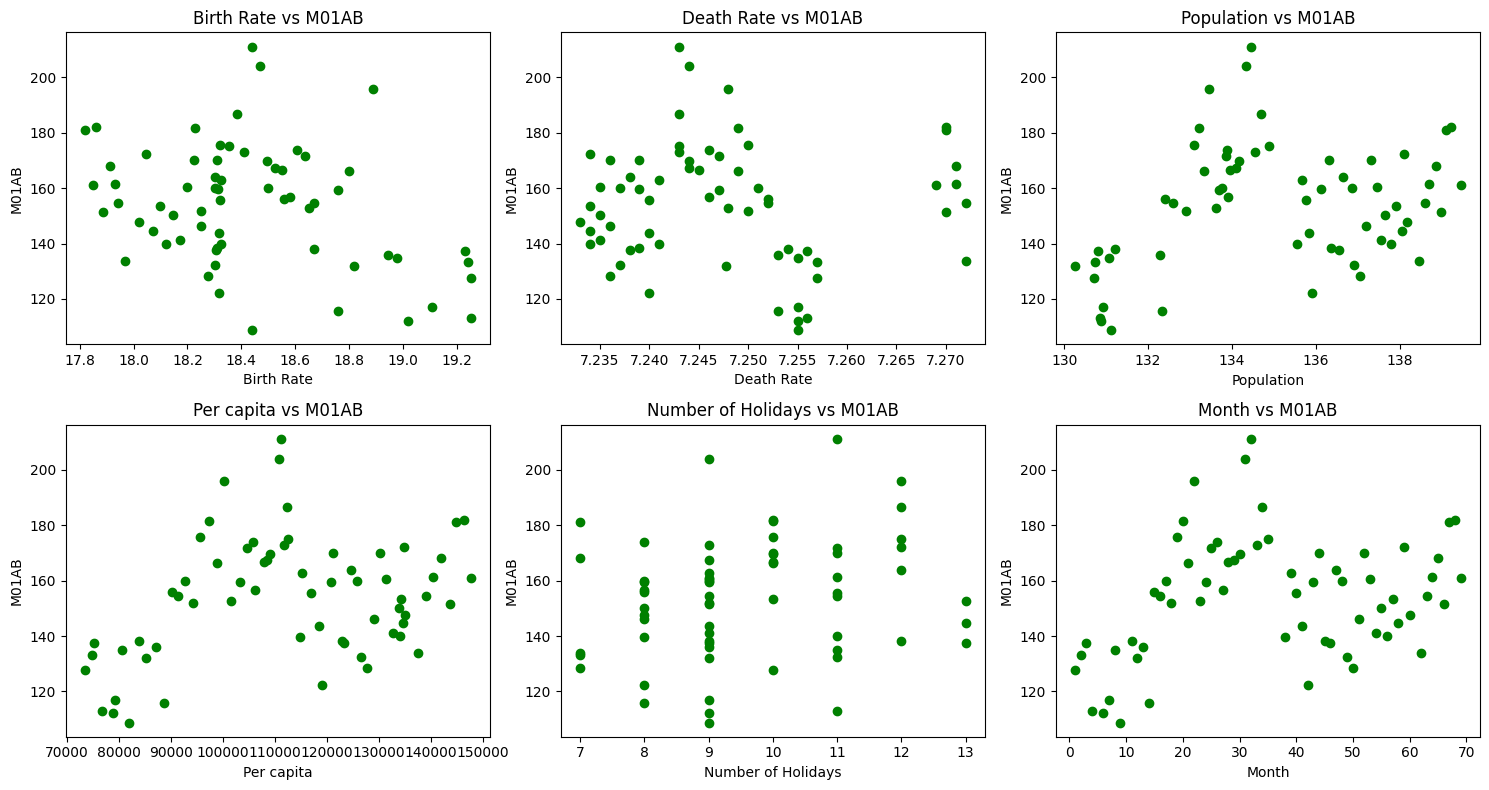

In [31]:
# Create a figure and subplots with 2 rows and 3 columns (6 subplots)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Reconstruct feature names for columns 10 to 15 of X (6 features)
feature_names = [
    'Birth Rate', 'Death Rate', 'Population',
    'Per capita', 'Number of Holidays',
    'Month'
]  # Adjust these names based on your transformations

# Get the name of the output column
output_name = dataset.columns[7]

# Iterate over columns 10 to 15 of X and plot against y
for i, feature_name in enumerate(feature_names):
    row = i // 3  # Adjust the calculation for row index
    col = i % 3   # Adjust the calculation for column index
    axes[row, col].scatter(X[:, i + 10], y[:, 0], color='green')
    axes[row, col].set_title(f'{feature_name} vs {output_name}')
    axes[row, col].set_xlabel(feature_name)  # Use the reconstructed feature names
    axes[row, col].set_ylabel(output_name)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Ploting graph between prev and upcomming demands

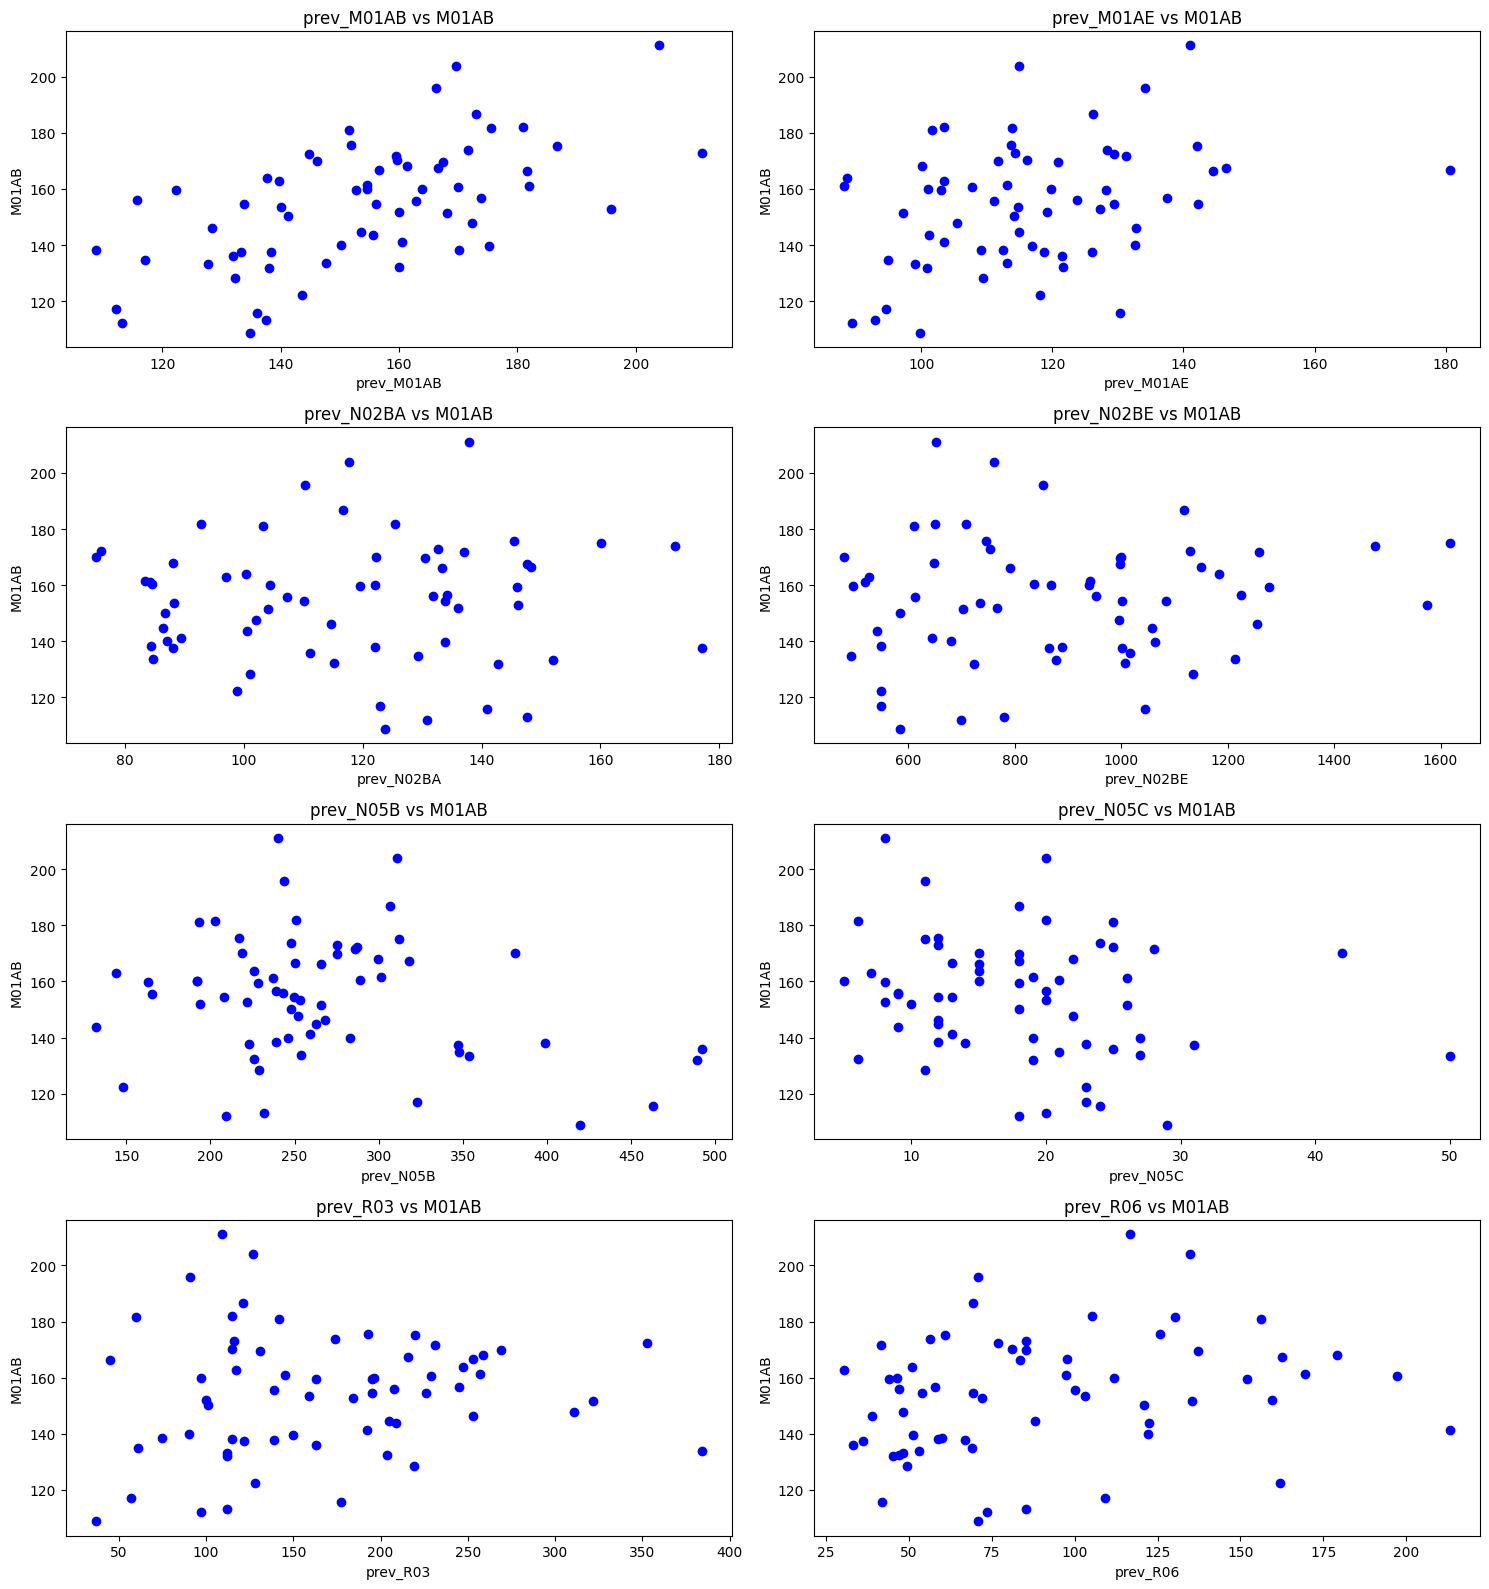

In [32]:
# Create a figure and subplots with 4 rows and 2 columns (8 subplots)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 16))

# Get the names of the last 8 columns
last_8_columns = ['prev_M01AB', 'prev_M01AE', 'prev_N02BA', 'prev_N02BE',
                   'prev_N05B', 'prev_N05C', 'prev_R03', 'prev_R06']

# Iterate over the last 8 columns and plot against 'M01AB'
for i, column_name in enumerate(last_8_columns):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    axes[row, col].scatter(dataset[column_name], dataset['M01AB'], color='blue')
    axes[row, col].set_title(f'{column_name} vs M01AB')
    axes[row, col].set_xlabel(column_name)
    axes[row, col].set_ylabel('M01AB')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Model Training

We are utilizing Random Forest regression in conjunction with multioutput regression to predict our demand.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators = 50, random_state =42))
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

Getting the best parameters of our model like number of trees(50) with Gridsearch

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 1. Define Reward Function (Negative MSE)
def reward_function(y_true, y_pred):
    return -mean_squared_error(y_true, y_pred)

# 2. Parameter Grid for Random Forest
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 5, 10],
}

# 3. Grid Search with Reward-Based Scoring
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring=reward_function,
    cv=5,
    n_jobs=-1
)

# 4. Fit Grid Search
grid_search.fit(X_train, y_train)

# 5. Best Parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 6. Train New Model with Best Parameters
base_estimator_params = {k.replace('estimator__', ''): v for k, v in best_params.items()}
best_regressor = RandomForestRegressor(**base_estimator_params)
best_regressor = MultiOutputRegressor(best_regressor)
best_regressor.fit(X_train, y_train)

# 7. Evaluate on Test Set
y_pred = best_regressor.predict(X_test)
test_reward = reward_function(y_test, y_pred)
print("Test Reward (Negative MSE):", test_reward)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'estimator__max_depth': None, 'estimator__n_estimators': 50}
Test Reward (Negative MSE): -4620.907184982081


We are now attempting to identify which feature our model depends on the most to determine their importance.

In [35]:
importances = regressor.estimators_[0].feature_importances_
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")

# Select top k features
k = 5  # Number of features to select
top_k_indices = np.argsort(importances)[::-1][:k]
X_train_selected = X_train[:, top_k_indices]
X_test_selected = X_test[:, top_k_indices]

# Retrain the model with selected features
regressor.fit(X_train_selected, y_train)
y_pred = regressor.predict(X_test_selected)

Feature 0: 0.0005823751334370524
Feature 1: 0.001625409350639616
Feature 2: 0.00039059916504530895
Feature 3: 0.0046600475900493744
Feature 4: 0.0034977162706078617
Feature 5: 0.008143670235093005
Feature 6: 0.0022555615315258642
Feature 7: 0.00703406281297363
Feature 8: 0.041509404658132715
Feature 9: 0.0019451710695776272
Feature 10: 0.05172665085480258
Feature 11: 0.03469946283364982
Feature 12: 0.03779481853645904
Feature 13: 0.037379690444667366
Feature 14: 0.015734053263124295
Feature 15: 0.09796009665656544
Feature 16: 0.32090243947211894
Feature 17: 0.03736378662601512
Feature 18: 0.03678731369720203
Feature 19: 0.018781983031909668
Feature 20: 0.07934695139540171
Feature 21: 0.03689931254920198
Feature 22: 0.07465412020599392
Feature 23: 0.04832530261580613


Taking a look on predicted value and actual value side by side of any one dependent valiable

In [36]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred[2].reshape(len(y_pred[2]),1), y_test[2].reshape(len(y_test[2]),1)),1))

[[127.06 127.69]
 [107.57  99.09]
 [160.8  152.1 ]
 [658.02 878.03]
 [268.1  354.  ]
 [ 18.68  50.  ]
 [106.44 112.  ]
 [101.94  48.2 ]]


Calculating the accuracy score of each of the outputs

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for each output
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    rmse = mean_squared_error(y_test[:, i], y_pred[:, i], squared=False)
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    print(f"Metrics for Output {i+1}:")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-squared:", r2)
    print("----")

Metrics for Output 1:
MSE: 170.10068913714312
RMSE: 13.04226549097752
R-squared: 0.5275011392942239
----
Metrics for Output 2:
MSE: 47.45324792331416
RMSE: 6.888631788919637
R-squared: 0.3257550462066424
----
Metrics for Output 3:
MSE: 37.734107307485765
RMSE: 6.142809398596522
R-squared: 0.9265916681214181
----
Metrics for Output 4:
MSE: 37411.84707028168
RMSE: 193.42142350391717
R-squared: 0.2960408544082911
----
Metrics for Output 5:
MSE: 1319.2972942857152
RMSE: 36.32213229266304
R-squared: 0.7347026947190025
----
Metrics for Output 6:
MSE: 190.56628571428573
RMSE: 13.804574811064835
R-squared: -0.06595296803652984
----
Metrics for Output 7:
MSE: 2293.1754035714284
RMSE: 47.88711103805938
R-squared: 0.5732022866687431
----
Metrics for Output 8:
MSE: 1639.8441971085729
RMSE: 40.4949897778549
R-squared: 0.3337021820296818
----


# Enhancing Predictions

- We can enhance the prediction accuracy by incorporating more comprehensive data.
- Given the data, our model can be extended to predict not only monthly values but also yearly and weekly trends.
- The same modeling approach and features can be applied across various domains, provided we have the relevant data:
  - Pharmaceuticals: Predicting demand for different medications and supplies.
  - E-commerce: Forecasting sales and inventory needs for online retail businesses.
  - Retail and manufacturing: Estimating production requirements and inventory levels for physical stores and manufacturers.
  - Banking and finance: Projecting financial metrics such as cash flow, loan demand, and market trends.